In [21]:
import cv2
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt

import torch
import torchvision.transforms as transforms
import torch.nn as nn

plt.rcParams['font.size'] = 14

In [23]:
filename = './images/Lenna.png'
image1 = cv2.imread(filename)
image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
print("Shape:", image1.shape)
print("Type:", image1.dtype)
print("Max pixel value:", image1.max())

Shape: (720, 720, 3)
Type: uint8
Max pixel value: 255


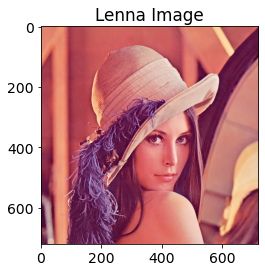

In [15]:
plt.title("Lenna Image")
plt.imshow(image1)
plt.show()

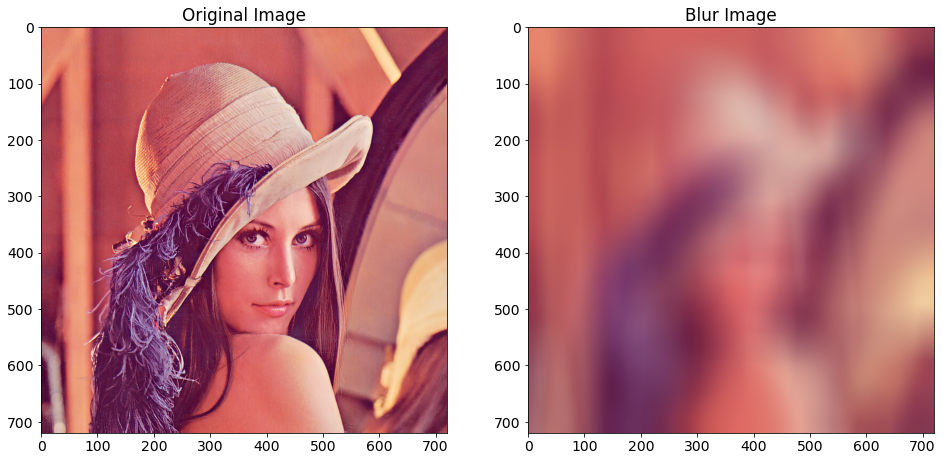

In [16]:
image2 = cv2.blur(image1, (100, 100), cv2.BORDER_DEFAULT)

fig, axes = plt.subplots(1, 2, figsize=(16, 8))
ax = axes.ravel()
ax[0].imshow(image1)
ax[0].set_title("Original Image")
ax[1].imshow(image2)
ax[1].set_title("Blur Image")
plt.show()

In [17]:
def _mse(img1, img2):
    tensor_img1 = transforms.ToTensor()(img1)
    tensor_img2 = transforms.ToTensor()(img2)
    return nn.functional.mse_loss(tensor_img1, tensor_img2).item()

def _ssim(img1, img2):
    im1 = tf.image.convert_image_dtype(img1, tf.float32)
    im2 = tf.image.convert_image_dtype(img2, tf.float32)
    return float(tf.image.ssim(im1, im2, max_val=1, filter_size=11))

def _psnr(img1, img2):
    return cv2.PSNR(img1, img2)

In [18]:
print("MSE:  ", _mse(image1, image2))
print("SSIM: ", _ssim(image1, image2))
print("PSNR: ", _psnr(image1, image2))
print("============================")
print("MSE:  ", _mse(image1, image1))    # -> min 0.0 изображения идентичны, ошибки нет, модель которая сгенерировала второе изображение качественная
print("SSIM: ", _ssim(image1, image1))   # -> max 1.0 изображения структурно идентичны (яркость, контраст, структура), различия не поддаются глазу
print("PSNR: ", _psnr(image1, image1))   # -> max 361.2 шума нет 

MSE:   0.016998710110783577
SSIM:  0.5817933678627014
PSNR:  17.695840541893496
MSE:   0.0
SSIM:  1.0
PSNR:  361.20199909921956
